### SVM

In [2]:
# pre-requisities

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the datset

df=pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### EDA

In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


In [8]:
# create x
x=df.drop('test_result',axis=1)

# create y
y = df['test_result']

In [9]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

### SVM Model

In [10]:
from sklearn.svm import SVC

# create the model
model = SVC()

# train the model
model.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
y_pred =model.predict(x_test)

#### Evaluation Metrics

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(confusion_matrix(y_test,y_pred))

print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 = {f1}")

[[338  55]
 [ 22 585]]
Accuracy = 0.923
Precision = 0.9140625
Recall = 0.9637561779242174
F1 = 0.9382518043303929


Text(0.5, 1.0, 'PREDICTION')

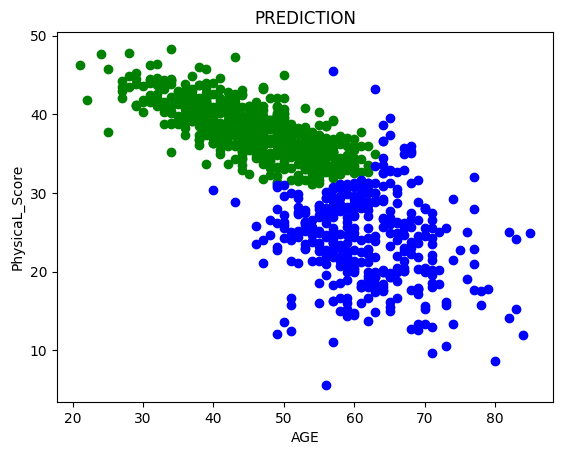

In [14]:
plt.scatter(x_test['age'][y_pred==1],x_test['physical_score'][y_pred==1],color="green")
plt.scatter(x_test['age'][y_pred==0],x_test['physical_score'][y_pred==0],color="blue")
plt.xlabel("AGE")
plt.ylabel("PhysicaL_Score")
plt.title("PREDICTION")

Text(0.5, 1.0, 'OBSERVED')

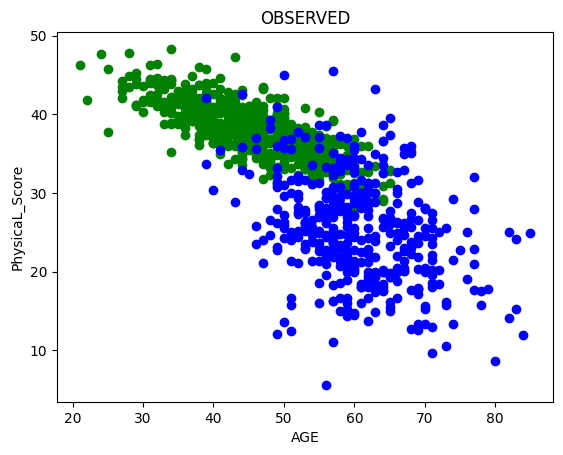

In [15]:
plt.scatter(x_test['age'][y_test==1],x_test['physical_score'][y_test==1],color="green")
plt.scatter(x_test['age'][y_test==0],x_test['physical_score'][y_test==0],color="blue")
plt.xlabel("AGE")
plt.ylabel("PhysicaL_Score")
plt.title("OBSERVED")